# Customer Segmentation using Machine Learning

Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the dataset
df = pd.read_csv("wholesale_customers.csv")

In [4]:
# Print the first 5 rows of the dataframe
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# view column names
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
# Check the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 440
Number of columns: 8


In [7]:
# Summary of the data
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
# Counting number of Null values in each column
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
# Checking Duplicates
df.duplicated().sum()

0

<Axes: >

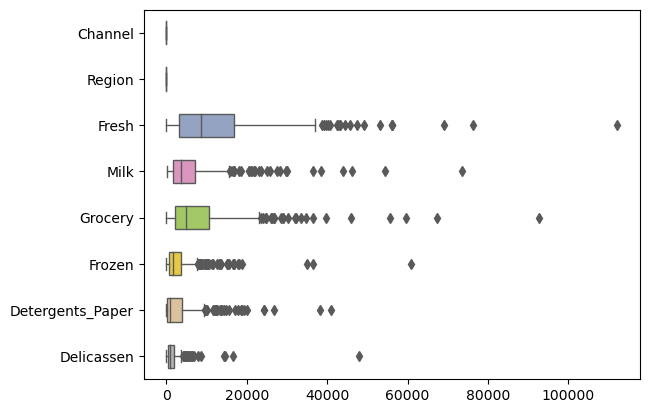

In [10]:
# Detecting Outliers

# Create box plots for each feature
sns.boxplot(data=df, orient="h", palette="Set2", width=0.5, fliersize=5, linewidth=1)

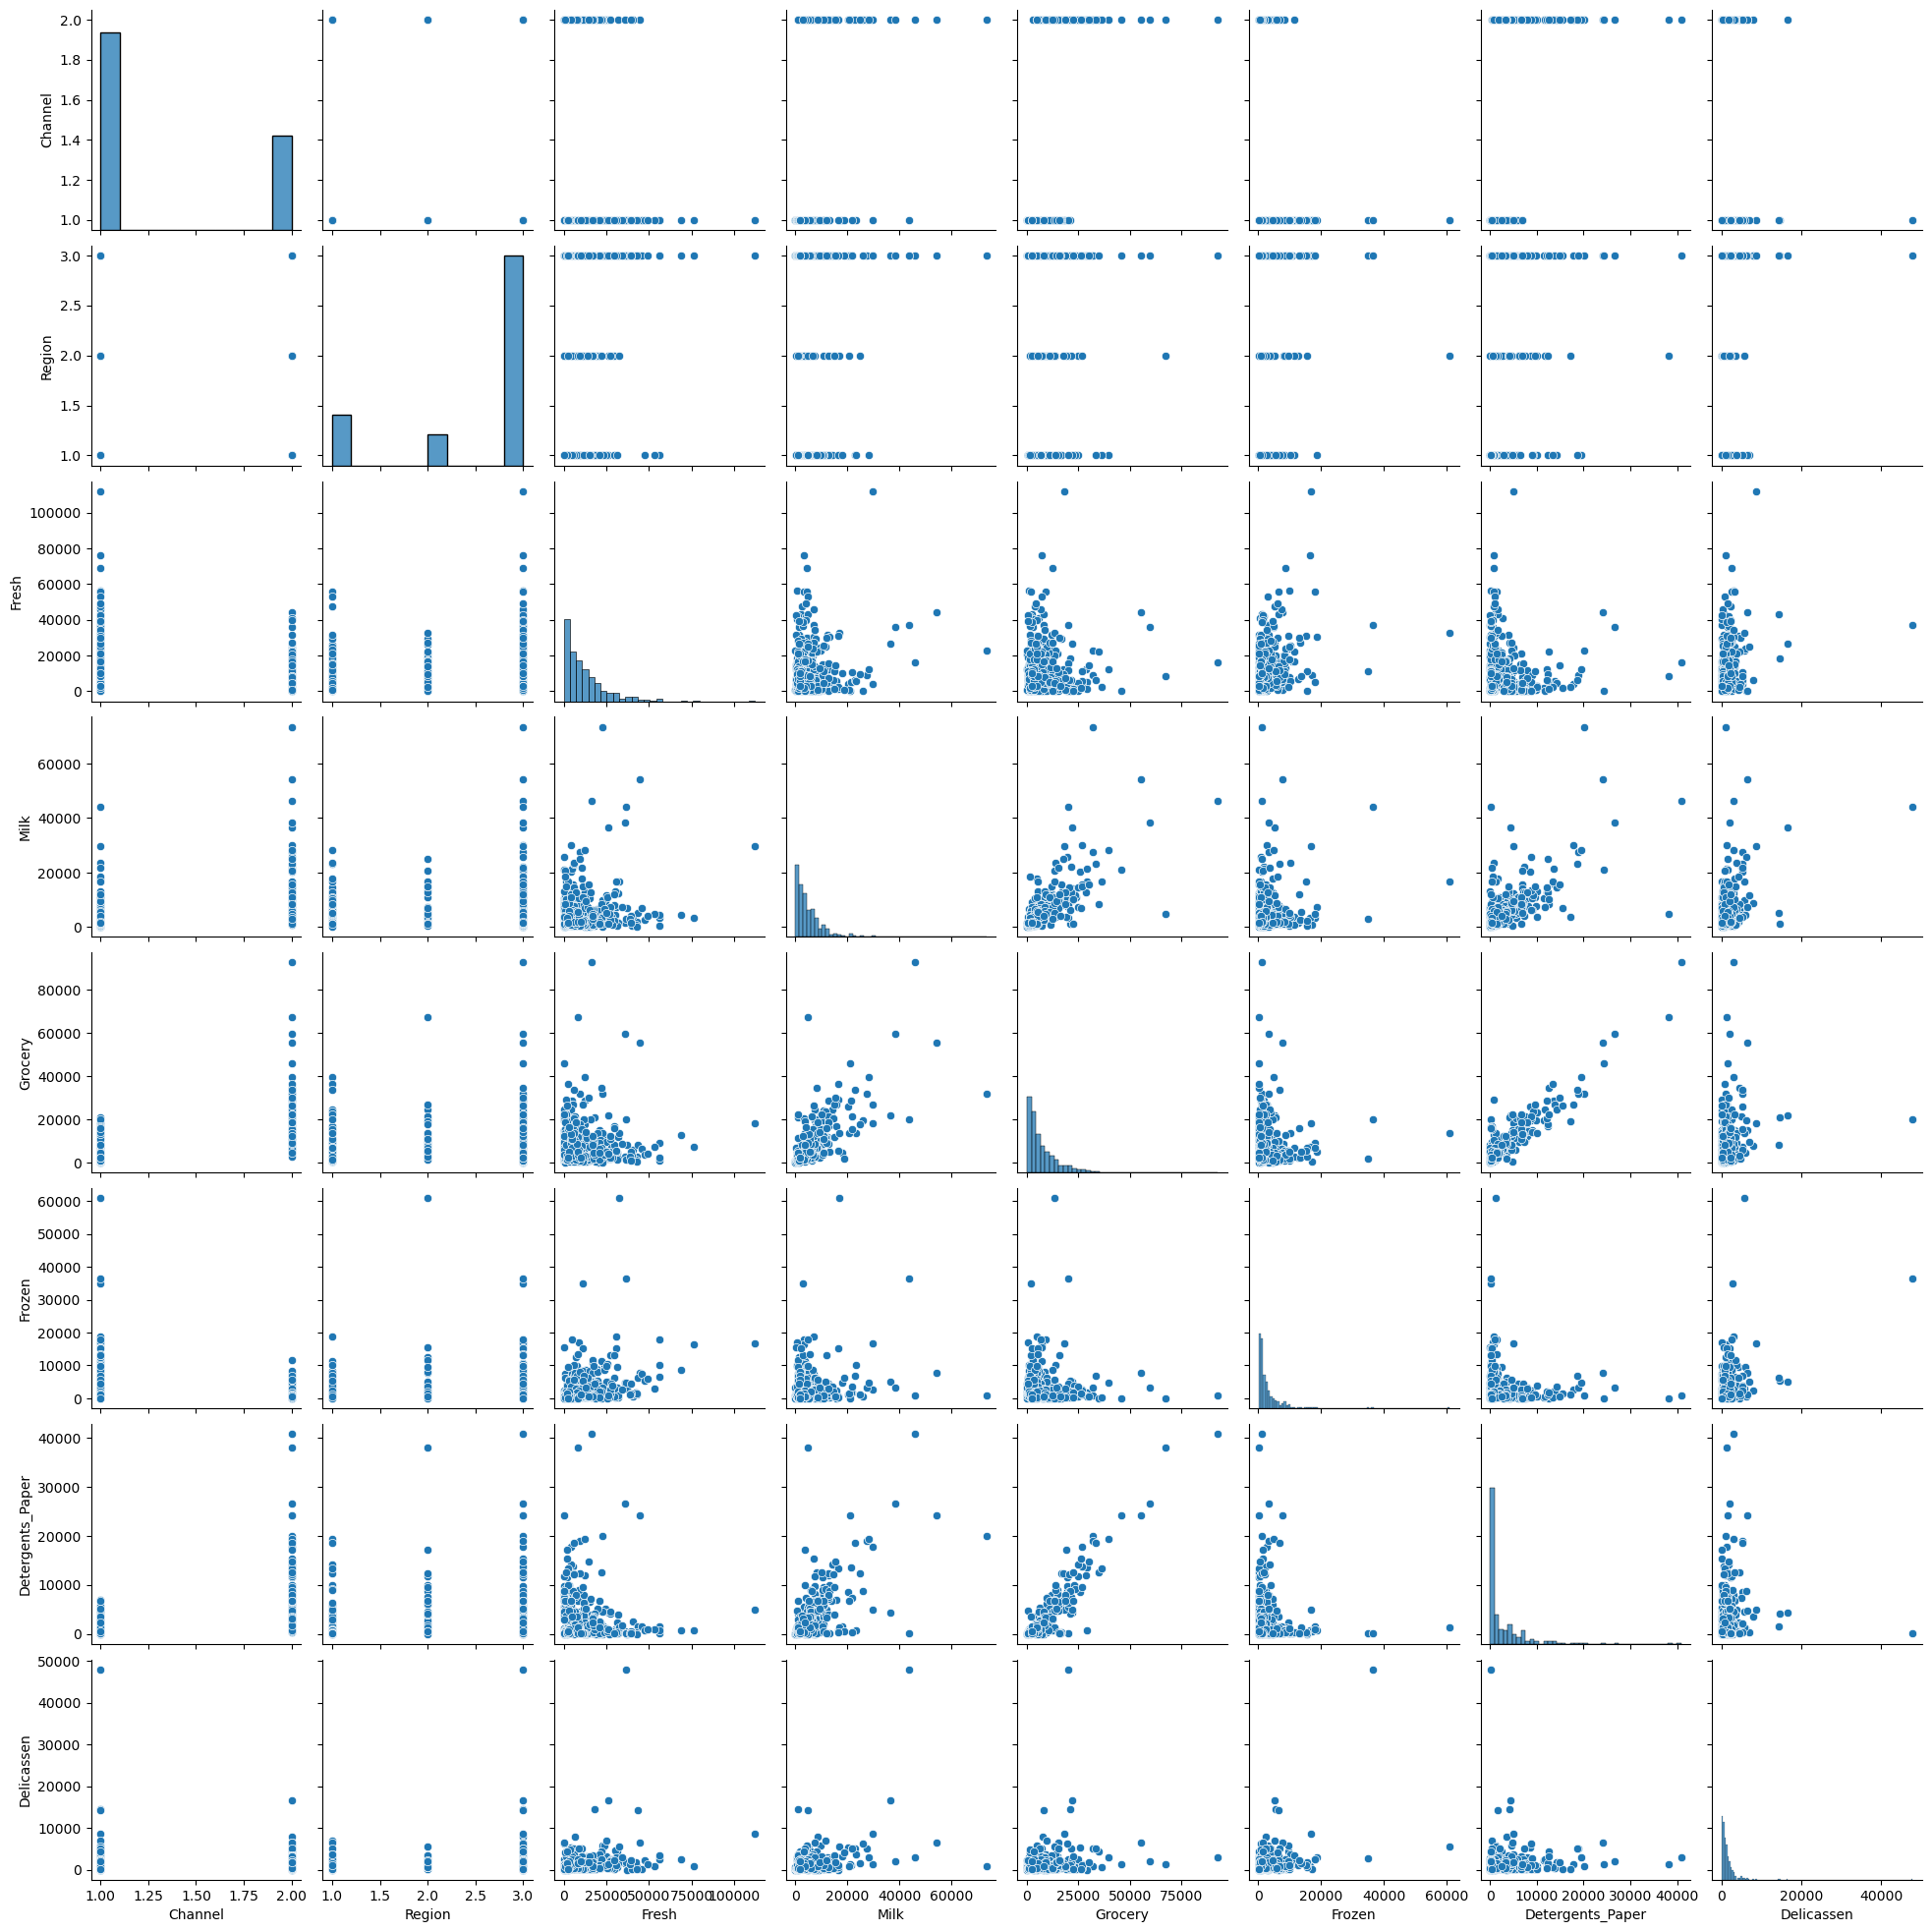

In [11]:
# Create a scatter plot matrix for each pair of features
sns.pairplot(data=df)

<Axes: >

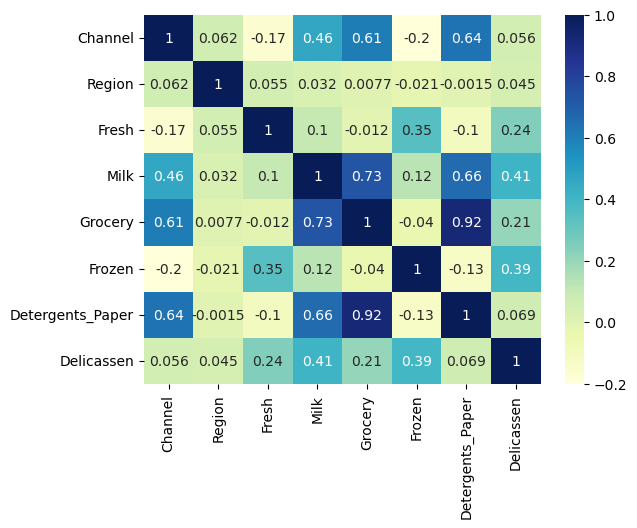

In [12]:
# Create a correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

Choosing a segmentation method

<u>Behavioral segmentation</u>: This method divides customers based on their behavior, such as their purchasing habits, brand loyalty, and product usage. This method can be useful for companies that want to identify and target customers who are most likely to purchase their products, or for businesses that want to understand the factors that drive customer behavior.

Feature Selection

In [13]:
# Select features
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [14]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Training the model

In [17]:
# Predict clusters
clusters = kmeans.predict(X_pca)

In [18]:
# Add clusters to data
df['cluster'] = clusters

In [19]:
# Print cluster sizes
print(df['cluster'].value_counts())

0    325
3    101
1     11
2      3
Name: cluster, dtype: int64


Evaluation of the model

In [21]:
# Import libraries
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [22]:
# Calculate silhouette score
silhouette = silhouette_score(X_pca, clusters)
print("Silhouette score:", silhouette)

Silhouette score: 0.4852196447334825


In [23]:
# Calculate Calinski-Harabasz index
ch = calinski_harabasz_score(X_pca, clusters)
print("Calinski-Harabasz index:", ch)

Calinski-Harabasz index: 308.35710979497355


Visualization

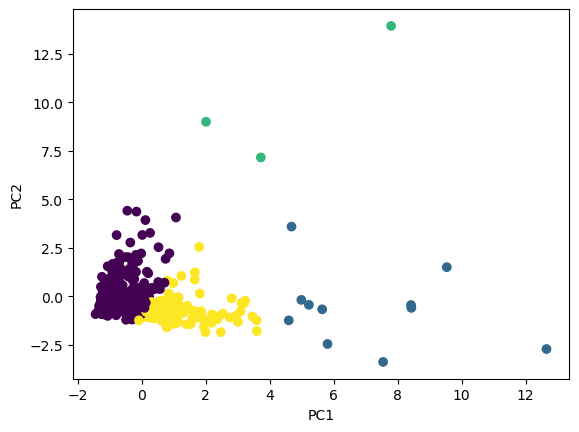

In [24]:
# Create scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

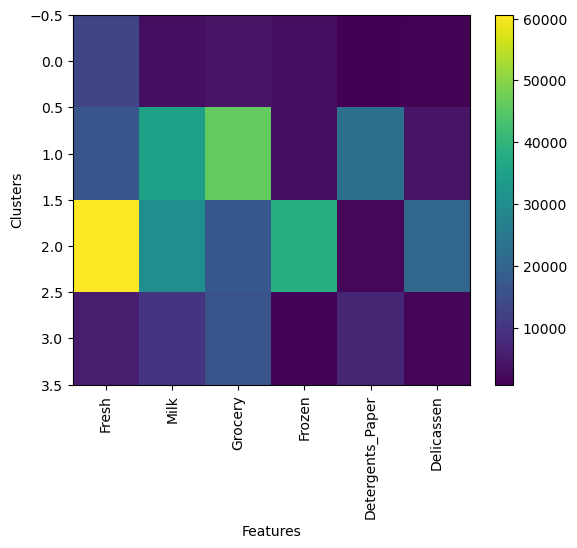

In [28]:
#number of clusters
k = 4
# Number of features
c = X.shape[1]

# Create Heatmap
cluster_means = np.zeros((k, c))
for i in range(k):
    cluster_means[i] = X[df['cluster'] == i].mean()

plt.imshow(cluster_means, cmap='viridis', aspect='auto')
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.xticks(range(c), X.columns, rotation=90)
plt.colorbar()
plt.show()

CONCLUSION : The K-Means algorithm segmented customers into 4 clusters based on their purchasing behavior, revealing distinct groups with varying product preferences. Model evaluation showed moderate performance with a silhouette score of 0.485 and a Calinski-Harabasz index of 308.36. This segmentation can guide targeted marketing and product strategies for businesses.